In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gc
import os
import seaborn as sb
import time
import json
import datetime as dt

from sklearn import metrics
from pandas.io.json import json_normalize
%matplotlib inline

In [5]:
train_df =  pd.read_csv('./train3.csv') 
train_df.dtypes

/home/jaytorasakar8/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


channelGrouping         object
date                     int64
device                  object
fullVisitorId           object
geoNetwork              object
sessionId               object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                  int64
visitNumber              int64
visitStartTime           int64
dtype: object

In [6]:
print(train_df.shape[0])

903653


In [7]:
train_df.head()

#train_df['device'][0] #We can see the data is in JSON Format

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600


#### Data is in JSON Format for the columns: Device, geonetworks, totals and traffic source

In [8]:
columns_in_json = ['device', 'geoNetwork', 'totals', 'trafficSource']

#We need to reload the Dataframe with all the data formatting 

def load_df(path_name):
    df = pd.read_csv(path_name, converters = {column: json.loads for column in columns_in_json}, dtype = {'fullVisitorId' : 'str'}, nrows = None )

    for column in columns_in_json:
        json_column_as_df = json_normalize(df[column])
        json_column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in json_column_as_df.columns]
        df = df.drop(column, axis = 1).merge(json_column_as_df, right_index = True, left_index = True)
    
    return df

#Reference: https://medium.com/@gis10kwo/converting-nested-json-data-to-csv-using-python-pandas-dc6eddc69175    

In [9]:
train_df = load_df('./train3.csv')
test_df = load_df('./test3.csv')

In [10]:
pd.set_option('display.max_columns', None)
test_df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,device.browserVersion,device.deviceCategory,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.mobileDeviceModel,device.mobileInputSelector,device.operatingSystem,device.operatingSystemVersion,device.screenColors,device.screenResolution,geoNetwork.city,geoNetwork.cityId,geoNetwork.continent,geoNetwork.country,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.networkLocation,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.visits,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20171016,6167871330617112363,6167871330617112363_1508151024,Not Socially Engaged,1508151024,2,1508151024,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,Asia,Singapore,not available in demo dataset,not available in demo dataset,(not set),myrepublic.com.sg,not available in demo dataset,(not set),Southeast Asia,NaN,4,NaN,4,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,NaN,google
1,Organic Search,20171016,0643697640977915618,0643697640977915618_1508175522,Not Socially Engaged,1508175522,1,1508175522,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,Zaragoza,not available in demo dataset,Europe,Spain,not available in demo dataset,not available in demo dataset,(not set),rima-tde.net,not available in demo dataset,Aragon,Southern Europe,NaN,5,1,5,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
2,Organic Search,20171016,6059383810968229466,6059383810968229466_1508143220,Not Socially Engaged,1508143220,1,1508143220,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Europe,France,not available in demo dataset,not available in demo dataset,not available in demo dataset,sfr.net,not available in demo dataset,not available in demo dataset,Western Europe,NaN,7,1,7,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
3,Organic Search,20171016,2376720078563423631,2376720078563423631_1508193530,Not Socially Engaged,1508193530,1,1508193530,Safari,not available in demo dataset,not available in demo dataset,mobile,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in 

In [11]:
pd.set_option('display.max_columns', None)
train_df.head()

#For displaying all columns Source: https://stackoverflow.com/questions/28775813/not-able-to-view-all-columns-in-pandas-data-frame 

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,device.browserVersion,device.deviceCategory,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.mobileDeviceModel,device.mobileInputSelector,device.operatingSystem,device.operatingSystemVersion,device.screenColors,device.screenResolution,geoNetwork.city,geoNetwork.cityId,geoNetwork.continent,geoNetwork.country,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.networkLocation,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,totals.visits,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,Izmir,not available in demo dataset,Asia,Turkey,not available in demo dataset,not available in demo dataset,(not set),ttnet.com.tr,not available in demo dataset,Izmir,Western Asia,1,1,1,1,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Oceania,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,Australasia,1,1,1,1,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,Madrid,not available in demo dataset,Europe,Spain,not available in demo dataset,not available in demo dataset,(not set),unknown.unknown,not available in demo dataset,Community of Madrid,Southern Europe,1,1,1,1,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not a

In [12]:
#Format the given date in regular format from POSIX format

#Reference: https://stackoverflow.com/questions/30132282/datetime-to-string-with-series-in-python-pandas

temp = train_df['date'].apply(lambda x: dt.datetime.strptime(str(x), "%Y%m%d") )
train_df['date'] = temp
train_df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,device.browserVersion,device.deviceCategory,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.mobileDeviceModel,device.mobileInputSelector,device.operatingSystem,device.operatingSystemVersion,device.screenColors,device.screenResolution,geoNetwork.city,geoNetwork.cityId,geoNetwork.continent,geoNetwork.country,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.networkLocation,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,totals.visits,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,Izmir,not available in demo dataset,Asia,Turkey,not available in demo dataset,not available in demo dataset,(not set),ttnet.com.tr,not available in demo dataset,Izmir,Western Asia,1,1,1,1,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Oceania,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,Australasia,1,1,1,1,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,Madrid,not available in demo dataset,Europe,Spain,not available in demo dataset,not available in demo dataset,(not set),unknown.unknown,not available in demo dataset,Community of Madrid,Southern Europe,1,1,1,1,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,Fal

In [16]:
log_values = train_df['totals.transactionRevenue'].fillna(0).astype(float)
log_values = log_values.apply(lambda x: np.log1p(x))
train_df['totals.transactionRevenue'] = log_values
train_df['totals.transactionRevenue'].describe()

count    903653.000000
mean          0.017448
std           0.153593
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.438278
Name: totals.transactionRevenue, dtype: float64

In [17]:
#This will give columns with constant values. So we can drop these features straight away

const_cols = [c for c in train_df.columns if train_df[c].nunique(dropna=False)==1 ]
const_cols

['socialEngagementType',
 'device.browserSize',
 'device.browserVersion',
 'device.flashVersion',
 'device.language',
 'device.mobileDeviceBranding',
 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName',
 'device.mobileDeviceModel',
 'device.mobileInputSelector',
 'device.operatingSystemVersion',
 'device.screenColors',
 'device.screenResolution',
 'geoNetwork.cityId',
 'geoNetwork.latitude',
 'geoNetwork.longitude',
 'geoNetwork.networkLocation',
 'totals.visits',
 'trafficSource.adwordsClickInfo.criteriaParameters']

In [18]:
print("Number of unique visitors in train set : ",train_df.fullVisitorId.nunique())

Number of unique visitors in train set :  714167


In [19]:
print("Variables not in test but in train : ", set(train_df.columns).difference(set(test_df.columns)))

Variables not in test but in train :  {'trafficSource.campaignCode', 'totals.transactionRevenue'}


In [20]:
#we need to drop columns which are not present in both the train and test data set
cols_to_drop = const_cols + ['sessionId']

train_df = train_df.drop(cols_to_drop + ["trafficSource.campaignCode"], axis=1)
test_df = test_df.drop(cols_to_drop, axis=1)


In [36]:
train_df.columns.values

array(['channelGrouping', 'date', 'fullVisitorId', 'visitId',
       'visitNumber', 'visitStartTime', 'device.browser',
       'device.deviceCategory', 'device.isMobile',
       'device.operatingSystem', 'geoNetwork.city',
       'geoNetwork.continent', 'geoNetwork.country', 'geoNetwork.metro',
       'geoNetwork.networkDomain', 'geoNetwork.region',
       'geoNetwork.subContinent', 'totals.bounces', 'totals.hits',
       'totals.newVisits', 'totals.pageviews',
       'totals.transactionRevenue', 'trafficSource.adContent',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.isVideoAd',
       'trafficSource.adwordsClickInfo.page',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
       'trafficSource.isTrueDirect', 'trafficSource.keyword',
       'trafficSource.medium', 'trafficSource.referralPath',
       'trafficSource.source'], dtype=object)

In [41]:
#Splitting the categorical variables and Numerical Variables
from sklearn import preprocessing
categorical_columns = ['channelGrouping', 'device.browser',
       'device.deviceCategory','device.operatingSystem', 'geoNetwork.city',
       'geoNetwork.continent', 'geoNetwork.country', 'geoNetwork.metro',
       'geoNetwork.networkDomain', 'geoNetwork.region',
       'geoNetwork.subContinent', 'trafficSource.adContent',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.isVideoAd',
       'trafficSource.adwordsClickInfo.page',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
       'trafficSource.isTrueDirect', 'trafficSource.keyword',
       'trafficSource.medium', 'trafficSource.referralPath',
       'trafficSource.source']

for column in categorical_columns:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train_df[column].values.astype('str')) + list(test_df[column].values.astype('str')))
    train_df[column] = lbl.transform(list(train_df[column].values.astype('str')))
    test_df[column] = lbl.transform(list(test_df[column].values.astype('str')))



In [42]:
train_df.describe()

,channelGrouping,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.transactionRevenue,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
count,903653.000000,9.036530e+05,903653.000000,9.036530e+05,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000
mean,4.632267,1.485007e+09,2.264897,1.485007e+09,44.014666,0.298370,12.949865,740.380483,2.716869,163.035326,85.871039,18911.072901,352.329262,13.310106,0.017448,61.549617,2.952512,58408.270643,0.976252,10.739166,2.975694,4.280819,0.696781,1897.047624,4.456896,2684.468135,254.317229
std,1.774791,9.022124e+06,9.283735,9.022124e+06,15.389741,0.526058,8.159630,302.648488,0.885558,69.196953,50.605625,16539.152347,173.492619,4.678611,0.153593,4.377804,0.304490,4404.462630,0.152263,1.672862,0.157577,1.510145,0.459649,1640.605290,2.076703,974.303431,166.515464
min,0.000000,1.470035e+09,1.000000,1.470035e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.477561e+09,1.000000,1.477561e+09,35.000000,0.000000,7.000000,540.000000,2.000000,97.000000,46.000000,0.000000,187.000000,12.000000,0.000000,62.000000,3.000000,59008.000000,1.000000,11.000000,3.000000,4.000000,0.000000,11.000000,5.000000,2604.000000,208.000000
50%,4.000000,1.483949e+09,1.000000,1.483949e+09,35.000000,0.000000,20.000000,955.000000,2.000000,210.000000,122.000000,16269.000000,482.000000,12.000000,0.000000,62.000000,3.000000,59008.000000,1.000000,11.000000,3.000000,4.000000,1.000000,3327.000000,5.000000,3196.000000,208.000000
75%,7.000000,1.492759e+09,1.000000,1.492759e+09,47.000000,1.000000,20.000000,955.000000,3.000000,218.000000,122.000000,37466.000000,482.000000,16.000000,0.000000,62.000000,3.000000,59008.000000,1.000000,11.000000,3.000000,4.000000,1.000000,3327.000000,6.000000,3196.000000,417.000000
max,7.000000,1.501657e+09,395.000000,1.501657e+09,117.000000,2.000000,23.000000,955.000000,5.000000,227.000000,122.000000,41980.000000,482.000000,22.000000,1.438278,76.000000,3.000000,59008.000000,1.000000,11.000000,3.000000,34.000000,1.000000,5391.000000,6.000000,3196.000000,499.000000


In [43]:
#For columns with numerical values
numerical_columns = ['totals.bounces', 'totals.hits',
       'totals.newVisits', 'totals.pageviews',
       'visitNumber', 'visitStartTime']
for column in numerical_columns:
    train_df[column] = train_df[column].astype(float)
    test_df[column] = test_df[column].astype(float)

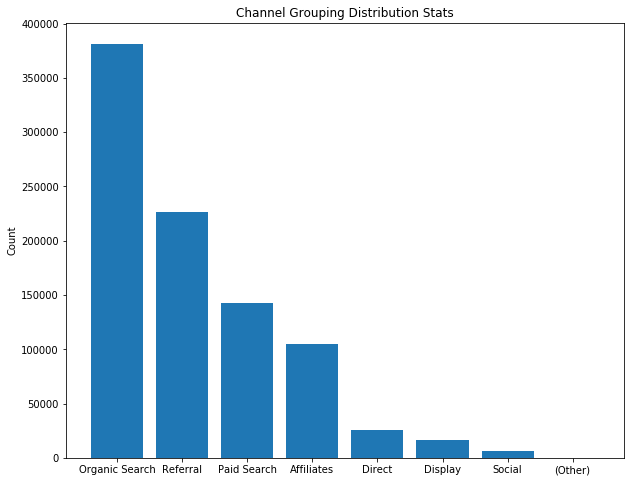

In [30]:
channel_group_column = train_df["channelGrouping"].unique()
channel_group_count = train_df["channelGrouping"].value_counts()

plt.figure(figsize = (10,8))
plt.bar(channel_group_column, channel_group_count, align='center', alpha=1)
plt.ylabel('Count')
plt.title('Channel Grouping Distribution Stats')
plt.show()


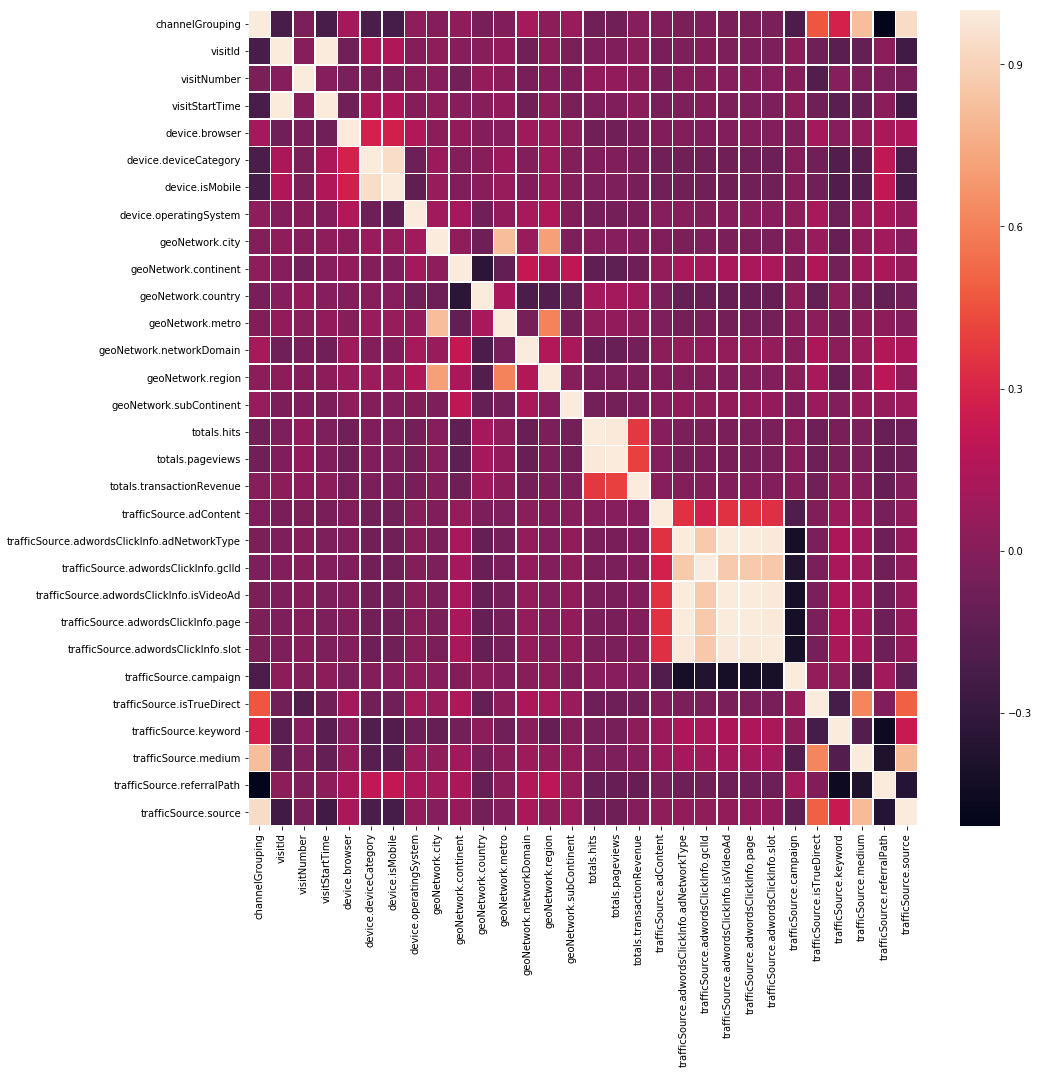

In [58]:
#Generating Coorelation And HeatMap

correlation_df = train_df[[i for i in list(train_df.columns) if i not in ['totals.bounces', 'totals.newVisits']]]
corr = correlation_df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sb.heatmap(corr,  linewidths=.5, annot=False)

#Reference: https://seaborn.pydata.org/generated/seaborn.heatmap.html

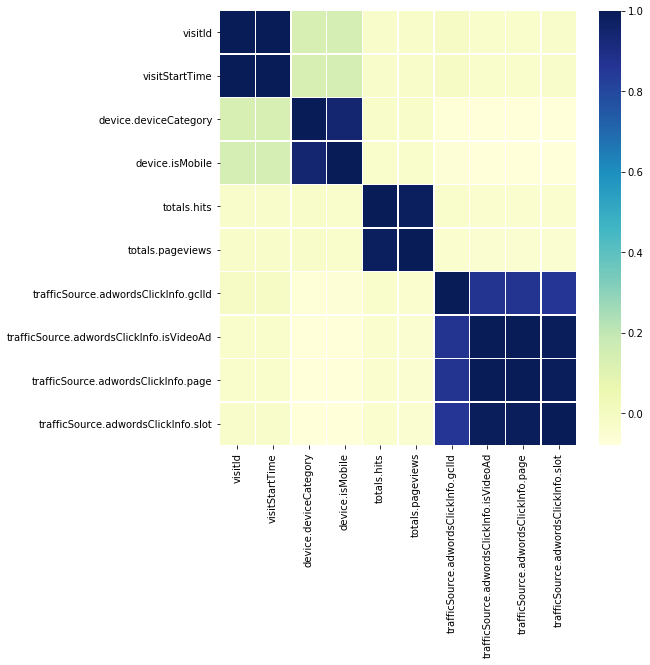

In [65]:
correlation_df1 = train_df[[i for i in list(train_df.columns) if i in ['visitId', 'visitStartTime','device.deviceCategory','device.isMobile', 'totals.hits','totals.pageviews', 'trafficSource.adwordsClickInfo.gclId', 'trafficSource.adwordsClickInfo.isVideoAd', 'trafficSource.adwordsClickInfo.page', 'trafficSource.adwordsClickInfo.slot'] ]];
corr1 = correlation_df1.corr()
fig, ax = plt.subplots(figsize=(8, 8))
sb.heatmap(corr1,  linewidths=.5, cmap="YlGnBu", annot=False)

#### Plots based on the Devices and it's various Categories

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(20,20))

train_df["device.browser"].value_counts().head(6).plot.bar(ax=axes[0][0],rot=30, title="Browser")
train_df["device.deviceCategory"].value_counts().plot.bar(ax=axes[0][1],rot=0,title="Category of Device")
train_df["device.isMobile"].value_counts().plot.bar(ax=axes[1][0],rot=0,title="Mobile Usage")
train_df["device.operatingSystem"].value_counts().head(7).plot.bar(ax=axes[1][1],rot=30,title="Operating System")

#Reference: https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.bar.html

In [ ]:
fig, axes = plt.subplots(3,2,figsize=(20,20))

train_df["geoNetwork.continent"].value_counts().plot.bar(ax=axes[0][0],rot=30, title="Continent")
train_df[train_df["geoNetwork.continent"] == "Americas"]["geoNetwork.subContinent"].value_counts().plot.bar(ax=axes[0][1], rot=0,title="American Continent Data")
train_df[train_df["geoNetwork.continent"] == "Asia"]["geoNetwork.subContinent"].value_counts().plot.bar(ax=axes[1][0],rot=0,title="Asian Continent Data")
train_df[train_df["geoNetwork.continent"] == "Europe"]["geoNetwork.subContinent"].value_counts().plot.bar(ax=axes[1][1],rot=0,title="European Continent Data")
train_df[train_df["geoNetwork.continent"] == "Africa"]["geoNetwork.subContinent"].value_counts().plot.bar(ax=axes[2][0],rot=0,title="African Continent Data")
train_df[train_df["geoNetwork.continent"] == "Oceania"]["geoNetwork.subContinent"].value_counts().plot.bar(ax=axes[2][1],rot=0,title="Oceanian Continent Data")

#Reference: https://stackoverflow.com/questions/29498652/plot-bar-graph-from-pandas-dataframe

In [ ]:
print(train_df["totals.transactionRevenue"].describe())

In [ ]:
revenue_datetime_df = train_df[["totals.transactionRevenue" , "date"]].dropna()
revenue_datetime_df["revenue"] = revenue_datetime_df["totals.transactionRevenue"].astype(np.int64)
revenue_datetime_df.head()

In [ ]:
daily_revenue_df = revenue_datetime_df.groupby(by=["date"],axis = 0 ).sum()

fig, axes = plt.subplots(figsize=(16,8))

axes.set_title("Revenue Generated based on Date")
axes.set_xlabel("Date")
axes.set_ylabel("Revenue Generated")
axes.plot(daily_revenue_df)

In [ ]:
######################################## Need to update Heatmap values ###############################

#revenue_datetime_df['values'] = revenue_datetime_df[['date', 'revenue']].values.tolist()
#revenue_datetime_df1 = np.array(revenue_datetime_df['values'])

#heatmap_data["revenue"] = revenue_datetime_df["revenue"]
#heatmap_data["continent"] = train_df["geoNetwork.continent"]
#sb.heatmap(revenue_datetime_df["revenue"].to_frame())

#Reference: https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [ ]:
##################################Need to update this on how to integrate external dataset with this current one
external_df =  pd.read_csv('./ExternalData/Train_external_data.csv') 
external_df.head()

In [ ]:
train_df.head()

In [ ]:
print(external_df.describe())

####################################################Need to find a way to merge the datasets

#We are checking if the dataset that we got contains any useless data elements or not 
external_df.isnull().sum() #Shows that there is no useless data present


In [ ]:
set(external_df['Client Id']).intersection(set(train_df['visitId']))